In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')

### import dataset

In [2]:
train_set = pd.read_csv("train.csv")
test_set = pd.read_csv("test.csv")

In [3]:
train_set.shape

(54808, 14)

In [4]:
test_set.shape

(23490, 13)

In [5]:
train_set.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [6]:
test_set.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,8724,Technology,region_26,Bachelor's,m,sourcing,1,24,NaN,1,1,0,77
1,74430,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,0,51
2,72255,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,0,47
3,38562,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,0,65
4,64486,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,0,61


In [7]:
employee_id = test_set['employee_id']

In [8]:
employee_id.shape

(23490,)

In [9]:
train_set.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
count,54808.000000,54808.000000,54808.000000,50684.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000
mean,39195.830627,1.253011,34.803915,3.329256,5.865512,0.351974,0.023172,63.386750,0.085170
std,22586.581449,0.609264,7.660169,1.259993,4.265094,0.477590,0.150450,13.371559,0.279137
min,1.000000,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000,0.000000
25%,19669.750000,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000,0.000000
50%,39225.500000,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000,0.000000
75%,58730.500000,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000,0.000000
max,78298.000000,10.000000,60.000000,5.000000,37.000000,1.000000,1.000000,99.000000,1.000000


In [10]:
test_set.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
count,23490.000000,23490.000000,23490.000000,21678.000000,23490.000000,23490.000000,23490.000000,23490.000000
mean,39041.399149,1.254236,34.782929,3.339146,5.810387,0.358834,0.022776,63.263133
std,22640.809201,0.600910,7.679492,1.263294,4.207917,0.479668,0.149191,13.411750
min,3.000000,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000
25%,19370.250000,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000
50%,38963.500000,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000
75%,58690.000000,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000
max,78295.000000,9.000000,60.000000,5.000000,34.000000,1.000000,1.000000,99.000000


In [11]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
employee_id             54808 non-null int64
department              54808 non-null object
region                  54808 non-null object
education               52399 non-null object
gender                  54808 non-null object
recruitment_channel     54808 non-null object
no_of_trainings         54808 non-null int64
age                     54808 non-null int64
previous_year_rating    50684 non-null float64
length_of_service       54808 non-null int64
KPIs_met >80%           54808 non-null int64
awards_won?             54808 non-null int64
avg_training_score      54808 non-null int64
is_promoted             54808 non-null int64
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


In [12]:
train_set = train_set.rename(columns = {"recruitment_channel" : "rec_channel", "no_of_trainings" : "training", "previous_year_rating" : "prev_year", "length_of_service": "len_service", "KPIs_met >80%" : "KPI","awards_won?" : "awards", "avg_training_score" : "training_score"})

In [13]:
test_set = test_set.rename(columns = {"recruitment_channel" : "rec_channel", "no_of_trainings" : "training", "previous_year_rating" : "prev_year", "length_of_service": "len_service", "KPIs_met >80%" : "KPI","awards_won?" : "awards", "avg_training_score" : "training_score"})

In [14]:
train_set.columns

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'rec_channel', 'training', 'age', 'prev_year', 'len_service', 'KPI',
       'awards', 'training_score', 'is_promoted'],
      dtype='object')

In [15]:
test_set.columns

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'rec_channel', 'training', 'age', 'prev_year', 'len_service', 'KPI',
       'awards', 'training_score'],
      dtype='object')

### Missing values

In [16]:
train_set.isnull().sum()

employee_id          0
department           0
region               0
education         2409
gender               0
rec_channel          0
training             0
age                  0
prev_year         4124
len_service          0
KPI                  0
awards               0
training_score       0
is_promoted          0
dtype: int64

In [17]:
test_set.isnull().sum()

employee_id          0
department           0
region               0
education         1034
gender               0
rec_channel          0
training             0
age                  0
prev_year         1812
len_service          0
KPI                  0
awards               0
training_score       0
dtype: int64

### EDA

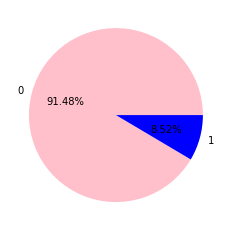

In [18]:
color = ['pink','blue']
plt.pie(train_set['is_promoted'].value_counts(), labels = ['0','1'], colors = color, autopct = "%.2f%%")
plt.show()

In [19]:
train_set['is_promoted'].value_counts()

0    50140
1     4668
Name: is_promoted, dtype: int64

Text(0, 0.5, 'count')

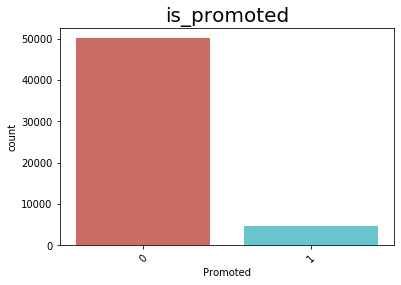

In [20]:
sns.countplot(x='is_promoted',data=train_set, palette='hls')
plt.title('is_promoted', fontsize = 20)
plt.xticks(rotation = 45)
plt.xlabel("Promoted")
plt.ylabel('count')

#### Observation :

Target variable is imbalanced

In [21]:
train_set['employee_id'].unique().sum()

2148245085

In [22]:
test_set['employee_id'].unique().sum()

917082466

#### Observation :

since employee id is unique and has no impact on target variable we can drop

In [23]:
train_set.drop(['employee_id'], inplace = True, axis = 1)

In [24]:
test_set.drop(['employee_id'], inplace = True, axis = 1)

In [25]:
train_set.shape

(54808, 13)

In [26]:
test_set.shape

(23490, 12)

In [27]:
train_set['department'].unique()

array(['Sales & Marketing', 'Operations', 'Technology', 'Analytics',
       'R&D', 'Procurement', 'Finance', 'HR', 'Legal'], dtype=object)

In [28]:
train_set['department'].value_counts()

Sales & Marketing    16840
Operations           11348
Technology            7138
Procurement           7138
Analytics             5352
Finance               2536
HR                    2418
Legal                 1039
R&D                    999
Name: department, dtype: int64

Text(0, 0.5, 'count')

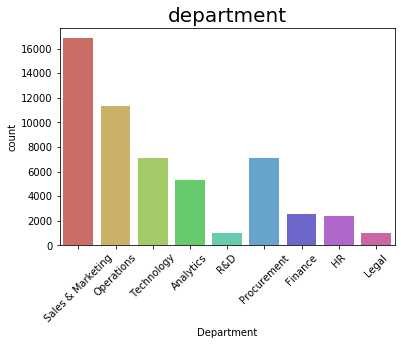

In [29]:
sns.countplot(x='department',data=train_set, palette='hls')
plt.title('department', fontsize = 20)
plt.xticks(rotation = 45)
plt.xlabel("Department")
plt.ylabel('count')

In [30]:
test_set['department'].value_counts()

Sales & Marketing    7315
Operations           4764
Procurement          3020
Technology           3011
Analytics            2319
Finance              1091
HR                   1085
Legal                 445
R&D                   440
Name: department, dtype: int64

Text(0, 0.5, 'count')

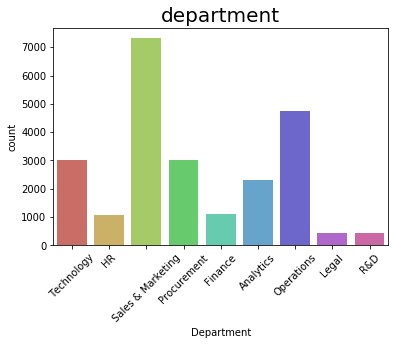

In [31]:
sns.countplot(x='department',data=test_set, palette='hls')
plt.title('department', fontsize = 20)
plt.xticks(rotation = 45)
plt.xlabel("Department")
plt.ylabel('count')

#### Observation

Sales & Marketing team has more number of employees, then operations,technology and procurement respectively

In [32]:
train_set['region'].unique()

array(['region_7', 'region_22', 'region_19', 'region_23', 'region_26',
       'region_2', 'region_20', 'region_34', 'region_1', 'region_4',
       'region_29', 'region_31', 'region_15', 'region_14', 'region_11',
       'region_5', 'region_28', 'region_17', 'region_13', 'region_16',
       'region_25', 'region_10', 'region_27', 'region_30', 'region_12',
       'region_21', 'region_8', 'region_32', 'region_6', 'region_33',
       'region_24', 'region_3', 'region_9', 'region_18'], dtype=object)

In [33]:
test_set['region'].unique()

array(['region_26', 'region_4', 'region_13', 'region_2', 'region_29',
       'region_7', 'region_22', 'region_16', 'region_17', 'region_24',
       'region_11', 'region_27', 'region_9', 'region_20', 'region_34',
       'region_23', 'region_8', 'region_14', 'region_31', 'region_19',
       'region_5', 'region_28', 'region_15', 'region_3', 'region_25',
       'region_12', 'region_21', 'region_30', 'region_10', 'region_33',
       'region_32', 'region_6', 'region_1', 'region_18'], dtype=object)

In [34]:
train_set['region'].value_counts()

region_2     12343
region_22     6428
region_7      4843
region_15     2808
region_13     2648
region_26     2260
region_31     1935
region_4      1703
region_27     1659
region_16     1465
region_28     1318
region_11     1315
region_23     1175
region_29      994
region_32      945
region_19      874
region_20      850
region_14      827
region_25      819
region_17      796
region_5       766
region_6       690
region_30      657
region_8       655
region_10      648
region_1       610
region_24      508
region_12      500
region_9       420
region_21      411
region_3       346
region_34      292
region_33      269
region_18       31
Name: region, dtype: int64

In [35]:
test_set['region'].value_counts()

region_2     5299
region_22    2739
region_7     1982
region_13    1167
region_15    1130
region_26    1011
region_31     844
region_4      775
region_27     710
region_28     595
region_16     590
region_11     571
region_23     516
region_32     433
region_29     414
region_19     410
region_17     361
region_14     350
region_5      342
region_25     337
region_20     326
region_6      298
region_30     273
region_10     269
region_8      269
region_1      238
region_24     219
region_12     215
region_9      180
region_21     179
region_34     155
region_3      147
region_33     126
region_18      20
Name: region, dtype: int64

#### Lets us find the relationship between is_promoted (Target variable) and region

Text(0, 0.5, 'Promoted or not')

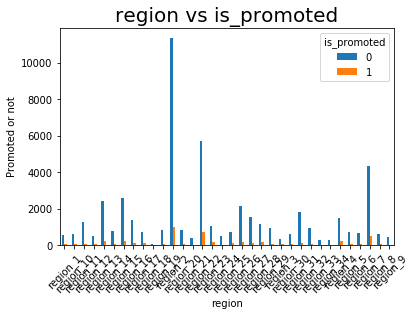

In [36]:
pd.crosstab(train_set.region,train_set.is_promoted).plot(kind='bar')
plt.title('region vs is_promoted', fontsize = 20)
plt.xticks(rotation = 45)
plt.xlabel('region')
plt.ylabel('Promoted or not')

In [37]:
train_set['gender'].unique()

array(['f', 'm'], dtype=object)

In [38]:
test_set['gender'].unique()

array(['m', 'f'], dtype=object)

In [39]:
train_set['gender'].value_counts()

m    38496
f    16312
Name: gender, dtype: int64

Text(0, 0.5, 'count')

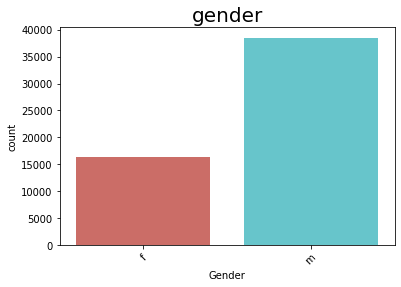

In [40]:
sns.countplot(x='gender',data=train_set, palette='hls')
plt.title('gender', fontsize = 20)
plt.xticks(rotation = 45)
plt.xlabel("Gender")
plt.ylabel('count')

In [41]:
test_set['gender'].value_counts()

m    16596
f     6894
Name: gender, dtype: int64

Text(0, 0.5, 'count')

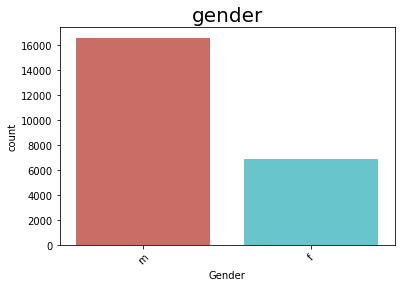

In [42]:
sns.countplot(x='gender',data=test_set, palette='hls')
plt.title('gender', fontsize = 20)
plt.xticks(rotation = 45)
plt.xlabel("Gender")
plt.ylabel('count')

In [43]:
train_set['rec_channel'].unique()

array(['sourcing', 'other', 'referred'], dtype=object)

In [44]:
train_set['rec_channel'].value_counts()

other       30446
sourcing    23220
referred     1142
Name: rec_channel, dtype: int64

Text(0, 0.5, 'count')

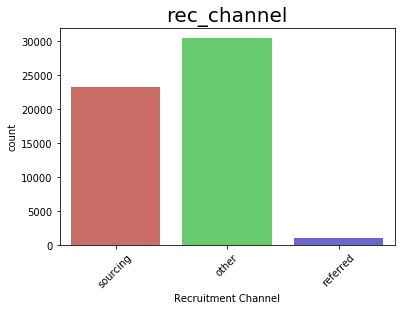

In [45]:
sns.countplot(x='rec_channel',data=train_set, palette='hls')
plt.title('rec_channel', fontsize = 20)
plt.xticks(rotation = 45)
plt.xlabel("Recruitment Channel")
plt.ylabel('count')

In [46]:
test_set['rec_channel'].value_counts()

other       13078
sourcing     9961
referred      451
Name: rec_channel, dtype: int64

Text(0, 0.5, 'count')

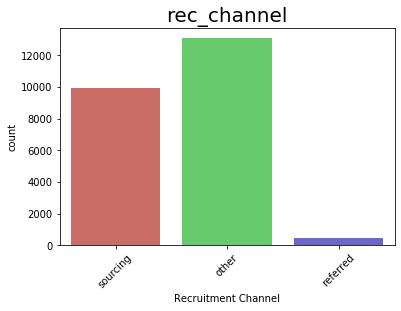

In [47]:
sns.countplot(x='rec_channel',data=test_set, palette='hls')
plt.title('rec_channel', fontsize = 20)
plt.xticks(rotation = 45)
plt.xlabel("Recruitment Channel")
plt.ylabel('count')

#### Observation

More number of employees are hiered from other sources and very less employees ae hiered from reference

In [48]:
train_set['training'].unique()

array([ 1,  2,  3,  4,  7,  5,  6,  8, 10,  9], dtype=int64)

In [49]:
train_set['training'].value_counts()

1     44378
2      7987
3      1776
4       468
5       128
6        44
7        12
10        5
9         5
8         5
Name: training, dtype: int64

Text(0, 0.5, 'count')

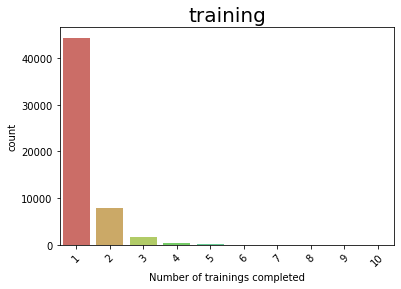

In [50]:
sns.countplot(x='training',data=train_set, palette='hls')
plt.title('training', fontsize = 20)
plt.xticks(rotation = 45)
plt.xlabel("Number of trainings completed")
plt.ylabel('count')

In [51]:
test_set['training'].value_counts()

1    18928
2     3544
3      755
4      190
5       36
6       24
7        9
9        2
8        2
Name: training, dtype: int64

Text(0, 0.5, 'count')

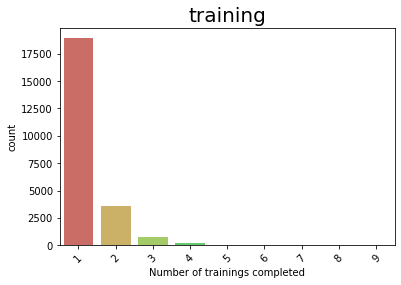

In [52]:
sns.countplot(x='training',data=test_set, palette='hls')
plt.title('training', fontsize = 20)
plt.xticks(rotation = 45)
plt.xlabel("Number of trainings completed")
plt.ylabel('count')

#### observation

We have more number of employees who completed 1 training 

In [53]:
train_set.columns

Index(['department', 'region', 'education', 'gender', 'rec_channel',
       'training', 'age', 'prev_year', 'len_service', 'KPI', 'awards',
       'training_score', 'is_promoted'],
      dtype='object')

In [54]:
for i in range(len(train_set)):
    if train_set.loc[i,"age"] >= 20.0 and train_set.loc[i,"age"]<30.0:
        train_set.loc[i, "age"] = "One"
    elif train_set.loc[i,"age"] >= 30.0 and train_set.loc[i,"age"]<40.0:
        train_set.loc[i, "age"] = "Two"
    elif train_set.loc[i,"age"] >= 40.0 and train_set.loc[i,"age"]<50.0:
        train_set.loc[i, "age"] = "Three"
    elif train_set.loc[i,"age"] >= 50.0 and train_set.loc[i,"age"]<60.0:
        train_set.loc[i, "age"] = "Four"
    elif train_set.loc[i,"age"] >= 60.0 and train_set.loc[i,"age"]<70.0:
        train_set.loc[i, "age"] = "Five"

In [55]:
for i in range(len(test_set)):
    if test_set.loc[i,"age"] >= 20.0 and test_set.loc[i,"age"]<30.0:
        test_set.loc[i, "age"] = "One"
    elif test_set.loc[i,"age"] >= 30.0 and test_set.loc[i,"age"]<40.0:
        test_set.loc[i, "age"] = "Two"
    elif test_set.loc[i,"age"] >= 40.0 and test_set.loc[i,"age"]<50.0:
        test_set.loc[i, "age"] = "Three"
    elif test_set.loc[i,"age"] >= 50.0 and test_set.loc[i,"age"]<60.0:
        test_set.loc[i, "age"] = "Four"
    elif test_set.loc[i,"age"] >= 60.0 and test_set.loc[i,"age"]<70.0:
        test_set.loc[i, "age"] = "Five"

In [56]:
train_set['len_service'].unique()

array([ 8,  4,  7, 10,  2,  5,  6,  1,  3, 16,  9, 11, 26, 12, 17, 14, 13,
       19, 15, 23, 18, 20, 22, 25, 28, 24, 31, 21, 29, 30, 34, 27, 33, 32,
       37], dtype=int64)

Text(0, 0.5, 'Promoted or not')

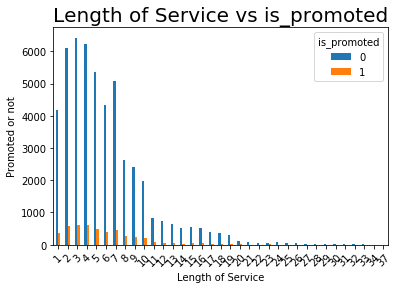

In [57]:
pd.crosstab(train_set.len_service,train_set.is_promoted).plot(kind='bar')
plt.title('Length of Service vs is_promoted', fontsize = 20)
plt.xticks(rotation = 45)
plt.xlabel('Length of Service')
plt.ylabel('Promoted or not')

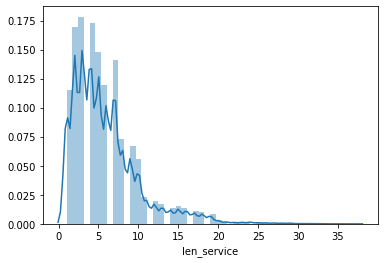

In [58]:
sns.distplot(train_set['len_service'])

In [59]:
train_set['len_service'] = np.log(train_set['len_service'])

In [60]:
train_set['len_service'].head(10)

0    2.079442
1    1.386294
2    1.945910
3    2.302585
4    0.693147
5    1.945910
6    1.609438
7    1.791759
8    1.609438
9    1.609438
Name: len_service, dtype: float64

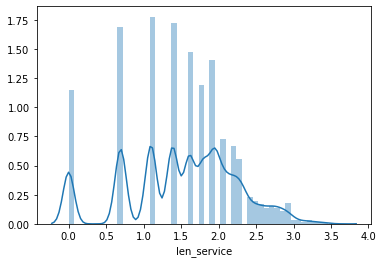

In [61]:
sns.distplot(train_set['len_service'])

In [62]:
train_set['KPI'].unique()

array([1, 0], dtype=int64)

In [63]:
train_set['KPI'].value_counts()

0    35517
1    19291
Name: KPI, dtype: int64

Text(0, 0.5, 'count')

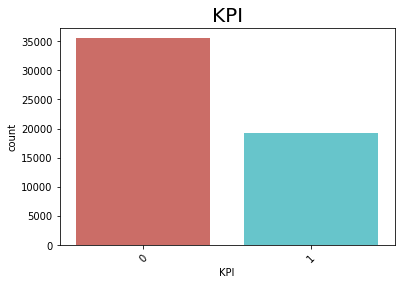

In [64]:
sns.countplot(x='KPI',data=train_set, palette='hls')
plt.title('KPI', fontsize = 20)
plt.xticks(rotation = 45)
plt.xlabel("KPI")
plt.ylabel('count')

In [65]:
test_set['KPI'].unique()

array([1, 0], dtype=int64)

Text(0, 0.5, 'count')

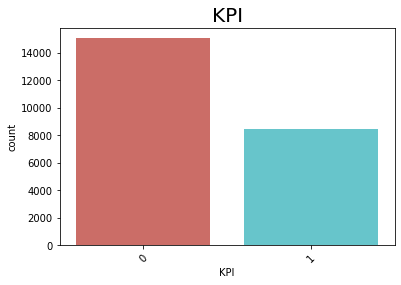

In [66]:
sns.countplot(x='KPI',data=test_set, palette='hls')
plt.title('KPI', fontsize = 20)
plt.xticks(rotation = 45)
plt.xlabel("KPI")
plt.ylabel('count')

In [67]:
train_set['awards'].unique()

array([0, 1], dtype=int64)

Text(0, 0.5, 'count')

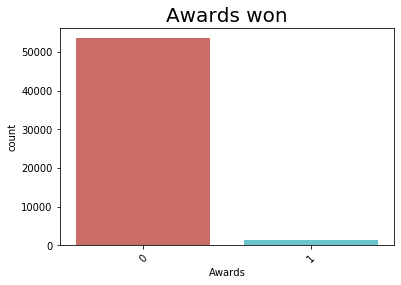

In [68]:
sns.countplot(x='awards',data=train_set, palette='hls')
plt.title('Awards won', fontsize = 20)
plt.xticks(rotation = 45)
plt.xlabel("Awards")
plt.ylabel('count')

Text(0, 0.5, 'count')

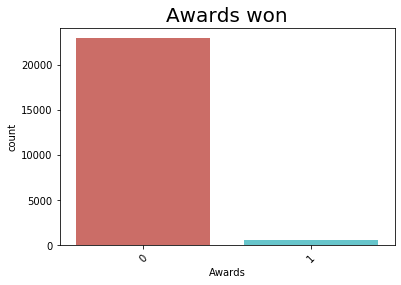

In [69]:
sns.countplot(x='awards',data=test_set, palette='hls')
plt.title('Awards won', fontsize = 20)
plt.xticks(rotation = 45)
plt.xlabel("Awards")
plt.ylabel('count')

In [70]:
train_set['training_score'].unique()

array([49, 60, 50, 73, 85, 59, 63, 83, 54, 77, 80, 84, 51, 46, 75, 57, 70,
       68, 79, 44, 72, 61, 48, 58, 87, 47, 52, 88, 71, 65, 62, 53, 78, 91,
       82, 69, 55, 74, 86, 90, 92, 67, 89, 56, 76, 81, 45, 64, 39, 94, 93,
       66, 95, 42, 96, 40, 99, 43, 97, 41, 98], dtype=int64)

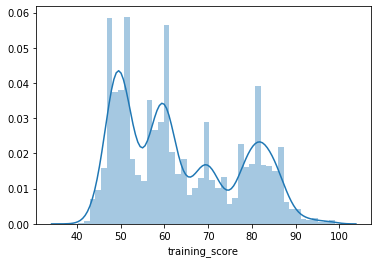

In [71]:
sns.distplot(train_set['training_score'])

In [72]:
train_set.groupby(['department','gender'])['is_promoted'].mean()

department         gender
Analytics          f         0.120858
                   m         0.092994
Finance            f         0.080764
                   m         0.081402
HR                 f         0.057654
                   m         0.055241
Legal              f         0.040268
                   m         0.052809
Operations         f         0.094505
                   m         0.087093
Procurement        f         0.117128
                   m         0.078681
R&D                f         0.105263
                   m         0.066879
Sales & Marketing  f         0.055802
                   m         0.075771
Technology         f         0.099354
                   m         0.112874
Name: is_promoted, dtype: float64

In [73]:
train_set.groupby(['region'])['is_promoted'].mean()

region
region_1     0.095082
region_10    0.078704
region_11    0.056274
region_12    0.066000
region_13    0.086858
region_14    0.074970
region_15    0.079060
region_16    0.069625
region_17    0.136935
region_18    0.032258
region_19    0.060641
region_2     0.080126
region_20    0.057647
region_21    0.043796
region_22    0.114188
region_23    0.116596
region_24    0.035433
region_25    0.125763
region_26    0.063274
region_27    0.078963
region_28    0.116844
region_29    0.043260
region_3     0.106936
region_30    0.089802
region_31    0.056848
region_32    0.042328
region_33    0.037175
region_34    0.027397
region_4     0.144451
region_5     0.045692
region_6     0.046377
region_7     0.106546
region_8     0.080916
region_9     0.019048
Name: is_promoted, dtype: float64

In [74]:
train_set.groupby(['training','KPI'])['is_promoted'].mean()

training  KPI
1         0      0.041271
          1      0.170940
2         0      0.035642
          1      0.160187
3         0      0.029150
          1      0.158965
4         0      0.020000
          1      0.161017
5         0      0.000000
          1      0.176471
6         0      0.000000
          1      0.250000
7         0      0.000000
          1      0.000000
8         0      0.000000
          1      0.000000
9         0      0.000000
10        0      0.000000
Name: is_promoted, dtype: float64

In [75]:
train_set.groupby(['gender'])['is_promoted'].mean()

gender
f    0.089934
m    0.083151
Name: is_promoted, dtype: float64

In [76]:
for col in train_set.columns:
    if(train_set[col].dtype == 'object'):
        temp_mode = train_set.loc[:,col].mode()[0]
        train_set[col] = train_set[col].fillna(temp_mode)
    else:
        temp_median = train_set.loc[:,col].median()
        train_set[col].fillna(temp_median, inplace = True)

In [77]:
train_set.isnull().sum()

department        0
region            0
education         0
gender            0
rec_channel       0
training          0
age               0
prev_year         0
len_service       0
KPI               0
awards            0
training_score    0
is_promoted       0
dtype: int64

In [78]:
for col in test_set.columns:
    if(test_set[col].dtype == 'object'):
        temp_mode = test_set.loc[:,col].mode()[0]
        test_set[col] = test_set[col].fillna(temp_mode)
    else:
        temp_median = test_set.loc[:,col].median()
        test_set[col].fillna(temp_median, inplace = True)

In [79]:
test_set.isnull().sum()

department        0
region            0
education         0
gender            0
rec_channel       0
training          0
age               0
prev_year         0
len_service       0
KPI               0
awards            0
training_score    0
dtype: int64

In [80]:
train_set.groupby(['education','gender'])['is_promoted'].mean()

education         gender
Bachelor's        f         0.083948
                  m         0.078540
Below Secondary   f         0.072664
                  m         0.089147
Master's & above  f         0.105065
                  m         0.095496
Name: is_promoted, dtype: float64

### Label Encoding/one hot encoding

In [81]:
train_set['education'].replace("Master's & above",2,inplace=True)
train_set['education'].replace("Bachelor's",1,inplace=True)
train_set['education'].replace("Below Secondary",0,inplace=True)

In [82]:
test_set['education'].replace("Master's & above",2,inplace=True)
test_set['education'].replace("Bachelor's",1,inplace=True)
test_set['education'].replace("Below Secondary",0,inplace=True)

In [83]:
Gender_final={'m':1,'f':2}
train_set.gender=[Gender_final[item]for item in train_set.gender]
test_set.gender = [Gender_final[item] for item in test_set.gender]

In [84]:
train_set['age'].unique()

array(['Two', 'Three', 'One', 'Four', 'Five'], dtype=object)

In [85]:
train_set.describe(include = 'object')

,department,region,rec_channel,age
count,54808,54808,54808,54808
unique,9,34,3,5
top,Sales & Marketing,region_2,other,Two
freq,16840,12343,30446,28030


In [86]:
from sklearn.preprocessing import LabelEncoder
LabelEncoder = LabelEncoder()

In [87]:
train_set['rec_channel']= LabelEncoder.fit_transform(train_set['rec_channel']) 
test_set['rec_channel']= LabelEncoder.fit_transform(test_set['rec_channel'])

In [88]:
train_set.groupby(['training_score'])['is_promoted'].mean()

training_score
39    0.000000
40    0.000000
41    0.038462
42    0.032258
43    0.039773
44    0.029851
45    0.045521
46    0.031690
47    0.045246
48    0.039393
49    0.037300
50    0.041237
51    0.043886
52    0.038793
53    0.033233
54    0.049147
55    0.053899
56    0.064486
57    0.057063
58    0.068493
59    0.070252
60    0.064037
61    0.077701
62    0.080690
63    0.092067
64    0.114407
65    0.108514
66    0.091379
67    0.101648
68    0.082353
        ...   
70    0.116588
71    0.120267
72    0.118621
73    0.112811
74    0.170901
75    0.121588
76    0.091085
77    0.093257
78    0.094319
79    0.072414
80    0.099502
81    0.109801
82    0.104354
83    0.106010
84    0.102740
85    0.097948
86    0.131579
87    0.128244
88    0.184685
89    0.279070
90    0.427027
91    0.649573
92    0.818182
93    0.892857
94    0.969231
95    1.000000
96    0.979167
97    1.000000
98    1.000000
99    1.000000
Name: is_promoted, Length: 61, dtype: float64

In [89]:
train_set['age']= LabelEncoder.fit_transform(train_set['age']) 
test_set['age']= LabelEncoder.fit_transform(test_set['age'])

In [90]:
test_set.describe(include = 'object')

,department,region
count,23490,23490
unique,9,34
top,Sales & Marketing,region_2
freq,7315,5299


In [91]:
Data= pd.get_dummies(train_set, drop_first= True)

In [92]:
test_data = pd.get_dummies(test_set, drop_first = True)

In [93]:
Data.shape

(54808, 52)

In [94]:
test_data.shape

(23490, 51)

### Apply SMOTE technique to handle imbalanced dataset

In [95]:
from imblearn.over_sampling import SMOTE 

In [96]:
Train_x = Data.drop(['is_promoted'], axis = 1).copy()
Train_y = Data['is_promoted'].copy()

In [97]:
Train_x_overfit, Train_y_overfit = SMOTE().fit_sample(Train_x, Train_y.values.ravel())

In [98]:
Train_x_overfit.shape

(100280, 51)

In [99]:
Train_y_overfit.shape

(100280,)

### Splitting

In [100]:
from sklearn.model_selection import train_test_split

In [101]:
x_train, x_test, y_train, y_test = train_test_split(Train_x_overfit, Train_y_overfit, test_size = 0.2, random_state = 0)

In [102]:
from sklearn.preprocessing import StandardScaler

In [103]:
sc = StandardScaler()

In [104]:
x_train = sc.fit_transform(x_train)
x_test  = sc.transform(x_test)

In [105]:
test_data = sc.transform(test_data)

### Model Building 

### Random Forest

In [106]:
from sklearn.ensemble import RandomForestClassifier

In [107]:
Model = RandomForestClassifier(random_state=123, n_estimators = 25, 
                               max_features = 5, min_samples_leaf = 500).fit(x_train, y_train)

In [108]:
Model_pred = Model.predict(x_test)

In [110]:
from sklearn.metrics import f1_score
f1_score(y_test,Model_pred)

0.8521210393805521

In [111]:
from sklearn.model_selection import GridSearchCV

my_param_grid = {'n_estimators':[15,25,30],
                 'max_features':[5,7,9],
                 'min_samples_leaf':[50,100]}

In [308]:
Grid_Search_Model = GridSearchCV(estimator=RandomForestClassifier(random_state = 123),
                                 param_grid=my_param_grid,
                                 scoring='accuracy',
                                 cv=5).fit(x_train, y_train)

In [309]:
Grid_Search_Df = pd.DataFrame.from_dict(Grid_Search_Model.cv_results_)
Grid_Search_Df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,param_min_samples_leaf,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.918537,0.011694,0.037493,0.007643,5,50,15,"{'max_features': 5, 'min_samples_leaf': 50, 'n...",0.896915,0.899657,0.903771,0.888813,0.896348,0.897101,0.004905,9
1,1.476359,0.006998,0.062478,0.000014,5,50,25,"{'max_features': 5, 'min_samples_leaf': 50, 'n...",0.897787,0.904643,0.903895,0.895544,0.896410,0.899656,0.003841,8
2,1.763313,0.012248,0.071856,0.007655,5,50,30,"{'max_features': 5, 'min_samples_leaf': 50, 'n...",0.899408,0.901839,0.903334,0.898598,0.900212,0.900678,0.001707,7
3,0.837308,0.007642,0.034361,0.006252,5,100,15,"{'max_features': 5, 'min_samples_leaf': 100, '...",0.875974,0.882331,0.873294,0.869367,0.875592,0.875312,0.004224,18
4,2.187704,0.891119,0.134751,0.133393,5,100,25,"{'max_features': 5, 'min_samples_leaf': 100, '...",0.879402,0.888626,0.874291,0.875911,0.881763,0.879999,0.005043,15
5,1.642197,0.019900,0.065599,0.006233,5,100,30,"{'max_features': 5, 'min_samples_leaf': 100, '...",0.881022,0.886008,0.874478,0.874914,0.881139,0.879512,0.004327,17
6,1.120109,0.011938,0.037491,0.007653,7,50,15,"{'max_features': 7, 'min_samples_leaf': 50, 'n...",0.900467,0.904643,0.902898,0.907199,0.897968,0.902635,0.003206,6
7,1.835200,0.015934,0.065612,0.006252,7,50,25,"{'max_features': 7, 'min_samples_leaf': 50, 'n...",0.899907,0.902649,0.903771,0.908944,0.902518,0.903558,0.002976,5
8,2.160112,0.009820,0.074982,0.006248,7,50,30,"{'max_features': 7, 'min_samples_leaf': 50, 'n...",0.901776,0.905516,0.907884,0.910689,0.904014,0.905976,0.003084,4
9,1.034547,0.015221,0.034367,0.006249,7,100,15,"{'max_features': 7, 'min_samples_leaf': 100, '...",0.879713,0.886320,0.877844,0.886444,0.869983,0.880061,0.006108,14


In [112]:
Final_Model = RandomForestClassifier(random_state = 123,n_estimators = 30, max_features = 9, min_samples_leaf=50).fit(x_train,y_train)

In [113]:
Final_Model_Predict = Final_Model.predict(x_test)

In [114]:
f1_score(y_test,Final_Model_Predict)

0.9206842923794711

### Apply on test set

In [115]:
Final_Model_Predict1 = Final_Model.predict(test_data)

In [116]:
Final_Model_Predict1

array([1, 0, 0, ..., 0, 0, 1], dtype=int64)

### Submission File

In [117]:
np.array(employee_id)

array([ 8724, 74430, 72255, ..., 45409,  1186,  5973], dtype=int64)

In [118]:
employee_id.shape

(23490,)

In [119]:
np.array(Final_Model_Predict)

array([1, 1, 1, ..., 1, 0, 0], dtype=int64)

In [120]:
Final_Model_Predict1.shape

(23490,)

In [123]:
Submission = pd.DataFrame({ 'employee_id': employee_id, 'is_promoted': Final_Model_Predict1 })

In [125]:
Submission.to_csv("Submission.csv", index=False)